### Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
url = "https://gist.githubusercontent.com/AramisAraujo/80c3026b561c6e27850c428b8e6e7b62/raw/7409762cb942e94f96b49a6a044877faf059b145/salesWinLoss.csv"
sales_data = pd.read_csv(url)
sales_data_original = sales_data

### Informações do tipo das variáveis

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       78025 non-null  int64  
 1   Supplies Subgroup                        78025 non-null  object 
 2   Supplies Group                           78025 non-null  object 
 3   Region                                   78025 non-null  object 
 4   Route To Market                          78025 non-null  object 
 5   Elapsed Days In Sales Stage              78025 non-null  int64  
 6   Opportunity Result                       78025 non-null  object 
 7   Sales Stage Change Count                 78025 non-null  int64  
 8   Total Days Identified Through Closing    78025 non-null  int64  
 9   Total Days Identified Through Qualified  78025 non-null  int64  
 10  Opportunity Amount USD                   78025

### Visualizar as variaveis

In [4]:
sales_data.head(10)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.696360,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.000000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.000000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.000000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.000000,0.141125,0.000000,4
5,1692390,Shelters & RV,Performance & Non-auto,Pacific,Reseller,89,Loss,3,114,0,232522,5,1,0,Unknown,0.000000,0.000877,0.000000,5
6,1935837,Garage & Car Care,Car Accessories,Pacific,Fields Sales,111,Won,12,112,112,20001,4,5,0,Unknown,0.308863,0.568487,0.122650,2
7,1952571,Exterior Accessories,Car Accessories,Pacific,Fields Sales,82,Loss,6,70,70,450000,1,1,0,Known,0.263610,0.736390,0.000000,6
8,1999486,Batteries & Accessories,Car Accessories,Northwest,Fields Sales,68,Loss,8,156,156,250000,1,5,0,None,0.000000,0.562821,0.437179,6
9,2052337,Exterior Accessories,Car Accessories,Pacific,Reseller,18,Loss,7,50,50,55003,1,1,0,Unknown,0.000000,0.585317,0.414683,4


### Visualizar os dados nulos

In [5]:
number_of_nulls_by_column = sales_data.isnull().sum().sort_values(ascending=False)
percent_of_nulls = sales_data.isnull().sum()/sales_data.isnull().count()*100
percent_rounded = (round(percent_of_nulls, 1)).sort_values(ascending=False)
missing_data = pd.concat([number_of_nulls_by_column, percent_rounded], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Deal Size Category,0,0.0
Total Days Identified Through Closing,0,0.0
Supplies Subgroup,0,0.0
Supplies Group,0,0.0
Region,0,0.0
Route To Market,0,0.0
Elapsed Days In Sales Stage,0,0.0
Opportunity Result,0,0.0
Sales Stage Change Count,0,0.0
Total Days Identified Through Qualified,0,0.0


### Correlacao das variaveis

In [67]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

sns.despine(offset=10, trim=True)



/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'hue' is not defined

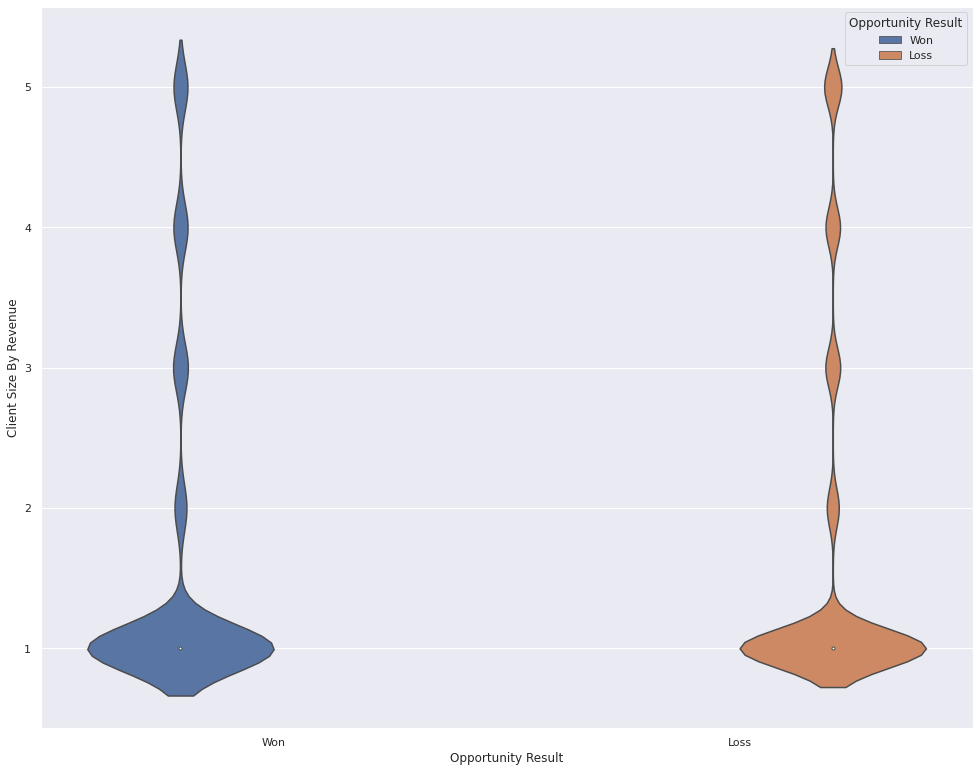

In [7]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()



**Relação entre a quantidade de empregados trabalhando em uma campanha e se essa possui um concorrente (conhecido ou não), demonstrando a perda ou ganho, mostrado por região.**

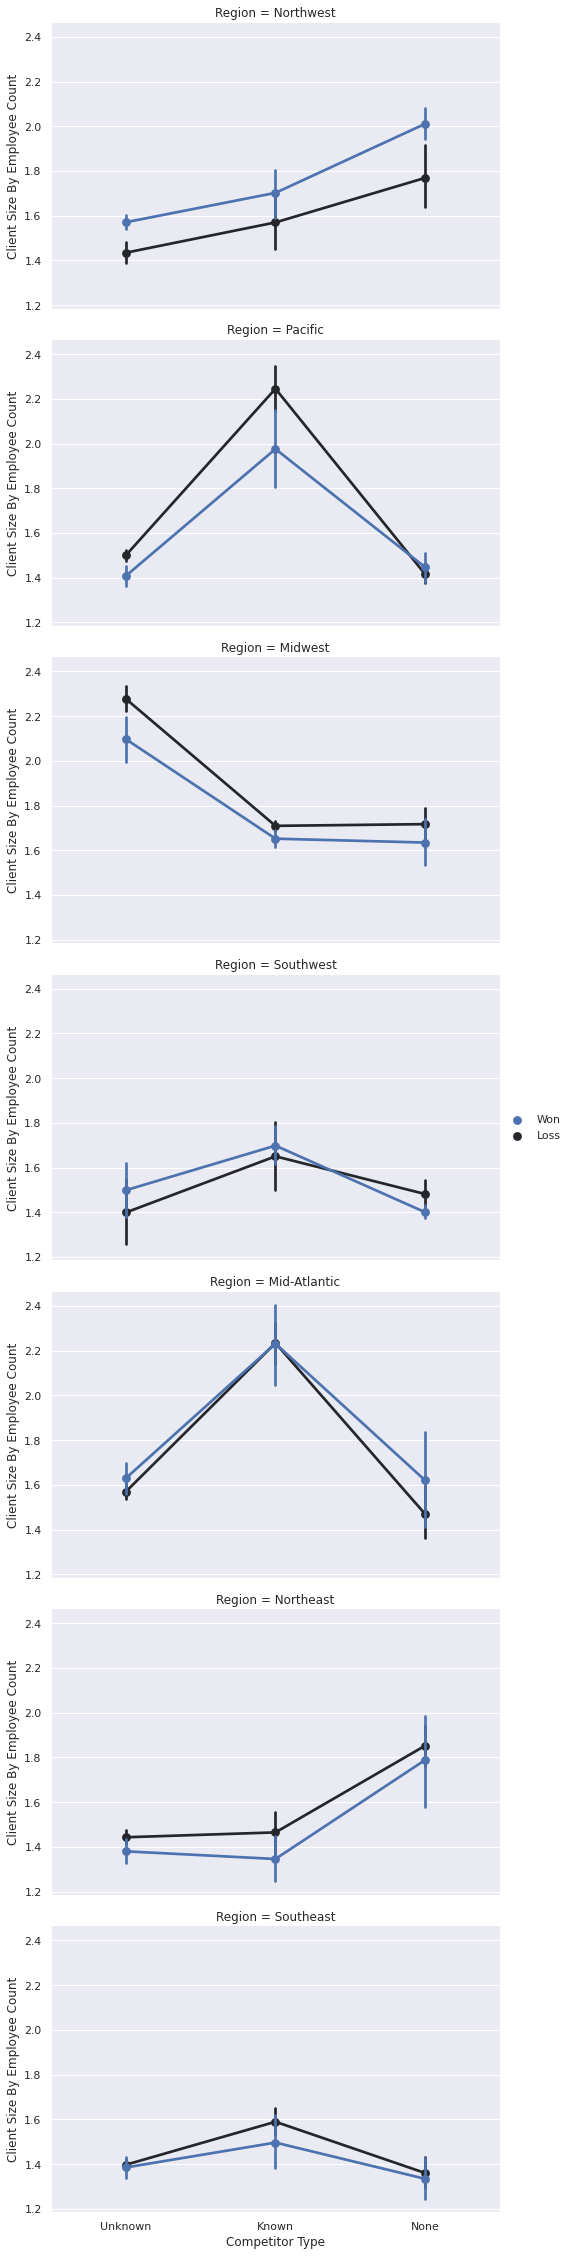

In [8]:
FacetGrid = sns.FacetGrid(sales_data_original, row= 'Region', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Competitor Type', 'Client Size By Employee Count', 'Opportunity Result', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Razão entre quantidade de oportunidades sucedidas e falhas por região, ordenada por quantia de dólares gasta

/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

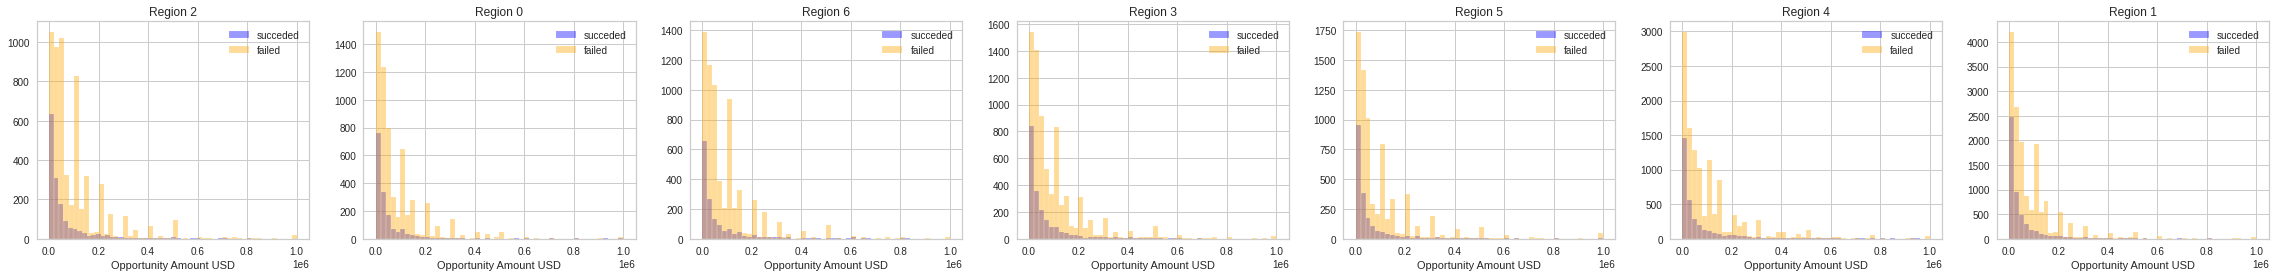

In [48]:
survived = 'succeded'
not_survived = 'failed'


fig, axes = plt.subplots(nrows=1, ncols=7,figsize=(40, 4))
reg0 = sales_data[sales_data['Region'] == 0]
reg1 = sales_data[sales_data['Region'] == 1]
reg2 = sales_data[sales_data['Region'] == 2]
reg3 = sales_data[sales_data['Region'] == 3]
reg4 = sales_data[sales_data['Region'] == 4]
reg5 = sales_data[sales_data['Region'] == 5]
reg6 = sales_data[sales_data['Region'] == 6]


reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[1], kde =False)
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Region 0')


reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[6], kde =False)
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[6], kde =False)
ax.legend()
ax.set_title('Region 1')


reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[0], kde =False)
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Region 2')


reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[3], kde =False)
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[3], kde =False)
ax.legend()
ax.set_title('Region 3')


reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[5], kde =False)
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[5], kde =False)
ax.legend()
ax.set_title('Region 4')


reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[4], kde =False)
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[4], kde =False)
ax.legend()
ax.set_title('Region 5')


reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[2], kde =False)
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[2], kde =False)
ax.legend()
ax.set_title('Region 6')



### Converter as variaveis categoricas em numericas

In [10]:
le = LabelEncoder()

sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [11]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Supplies Subgroup                            int64
Supplies Group                               int64
Region                                       int64
Route To Market                              int64
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                              int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [12]:
corr = numeric_features.corr()

print (corr['Opportunity Result'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Result'].sort_values(ascending=False)[-10:])

Opportunity Result                    1.000000
Revenue From Client Past Two Years    0.277688
Ratio Days Qualified To Total Days    0.208131
Sales Stage Change Count              0.092017
Route To Market                       0.081942
Opportunity Number                    0.042167
Competitor Type                      -0.003661
Elapsed Days In Sales Stage          -0.016561
Client Size By Revenue               -0.017341
Client Size By Employee Count        -0.019456
Name: Opportunity Result, dtype: float64 

Client Size By Employee Count             -0.019456
Supplies Group                            -0.026049
Region                                    -0.030763
Supplies Subgroup                         -0.035639
Opportunity Amount USD                    -0.075764
Ratio Days Validated To Total Days        -0.172233
Deal Size Category                        -0.192270
Ratio Days Identified To Total Days       -0.201432
Total Days Identified Through Closing     -0.262864
Total Days Identifi

### Matriz de correlacao

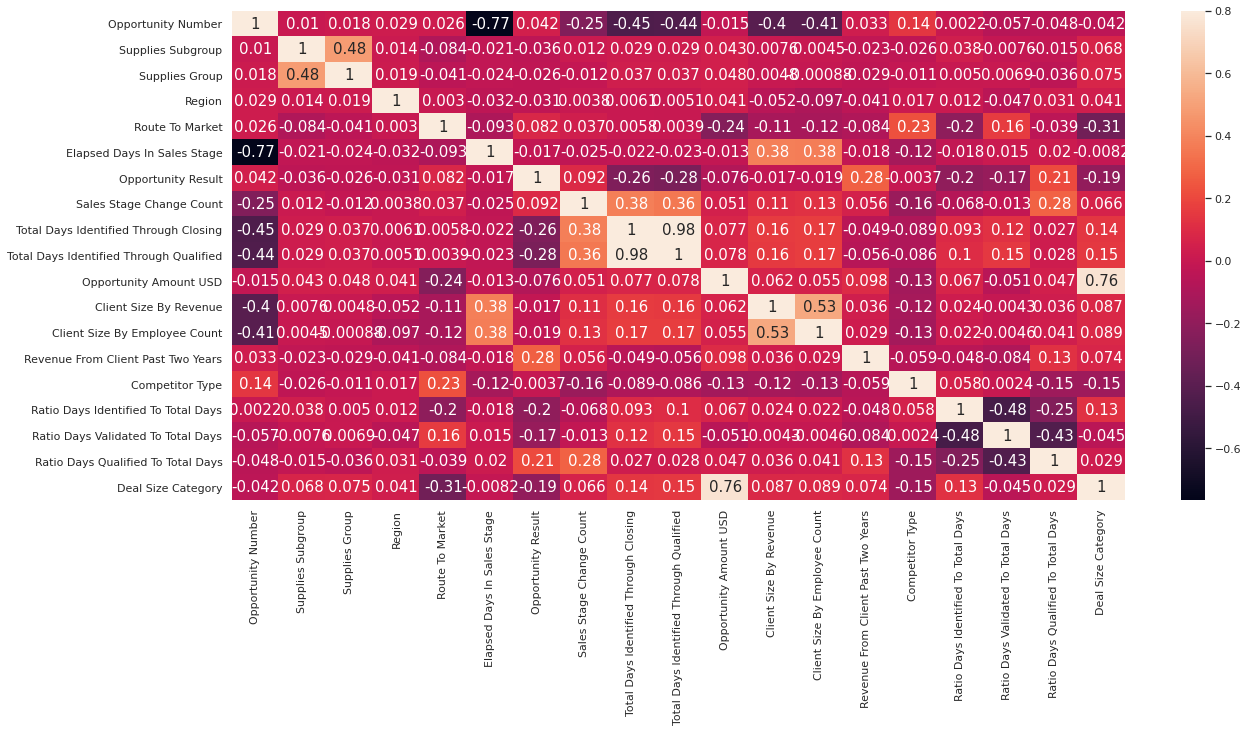

In [13]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 15}, annot=True);


### Training Set & Test Set

In [14]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

data = sales_data[cols]
target = sales_data['Opportunity Result']

data.head(2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


### Split data set into train and test

In [15]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)


### Building  the model - Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
start = time.time()
gnb = GaussianNB()

pred = gnb.fit(data_train, target_train).predict(data_test)

acc_gaussian = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Naive-Bayes accuracy : ",acc_gaussian, "%")
print("Tempo de Execução:", end - start, "segundos")

Naive-Bayes accuracy :  75.91 %
Tempo de Execução: 0.13182449340820312 segundos


### Building the model - Random Forest

In [17]:
#A floresta construída é um conjunto de árvores de decisão na maioria das vezes treinadas pelo método "bagging". A ideia geral desse método é que uma combinação de modelos de aprendizagem aumentem o resultado geral.
start = time.time()
random_forest = RandomForestClassifier()
pred = random_forest.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model Random Forest
acc_random_forest = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Random Forest accuracy :", acc_random_forest, "%")
print("Tempo de Execução:", end - start, "segundos")

Random Forest accuracy : 87.84 %
Tempo de Execução: 15.870847225189209 segundos


### Building the model - Logistic Regression

In [18]:
#Esta técnica tem como objetivo produzir, a partir de observações, um modelo que permita a predição de valores tomados por uma variável categórica (Frequentemente binárias). 
start = time.time()
logreg = LogisticRegression()

#print the accuracy score of the model Logistic Regression
pred = logreg.fit(data_train, target_train).predict(data_test)
acc_log = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Logistic Regression accuracy :", acc_log, "%")
print("Tempo de Execução:", end - start, "segundos")

Logistic Regression accuracy : 77.18 %
Tempo de Execução: 1.1668078899383545 segundos


### Building the model - Stochastic Gradient

In [19]:
# Implementa uma rotina de aprendizado de descida de gradiente estocástica simples que suporta diferentes funções de perda e penalidades para classificação.
start = time.time()
sgd = linear_model.SGDClassifier(tol=None)
sgd.fit(data_train, target_train)
Y_pred = sgd.predict(data_test)

sgd.score(data_train, target_train)

acc_sgd = round(sgd.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Stochastic Gradient Decent accuracy: ",acc_sgd, "%")
print("Tempo de Execução:", end - start, "segundos")

Stochastic Gradient Decent accuracy:  77.62 %
Tempo de Execução: 16.186098098754883 segundos


### Building the model - Support Vector Machines


In [20]:
start = time.time()
linear_svc = LinearSVC()
linear_svc.fit(data_train, target_train)

Y_pred = linear_svc.predict(data_test)

acc_linear_svc = round(linear_svc.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Support Vector Machines: ",acc_linear_svc, "%")
print("Tempo de Execução:", end - start, "segundos")

Support Vector Machines:  42.5 %
Tempo de Execução: 27.697717905044556 segundos
/home/nguyennhuy/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Building the model - KNN


In [21]:
start = time.time()

knn = KNeighborsClassifier()
knn.fit(data_train, target_train)
Y_pred = knn.predict(data_test)

acc_knn = round(knn.score(data_train, target_train) * 100, 2)
end = time.time()

print ("KNN: ",acc_knn, "%")
print("Tempo de Execução:", end - start, "segundos")

KNN:  86.58 %
Tempo de Execução: 270.81724762916565 segundos


### Building the model - Perceptron


In [22]:
start = time.time()
perceptron = Perceptron(max_iter=2000)
perceptron.fit(data_train, target_train)

Y_pred = perceptron.predict(data_test)

acc_perceptron = round(perceptron.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Perceptron: ",acc_perceptron, "%")
print("Tempo de Execução:", end - start, "segundos")

Perceptron:  75.43 %
Tempo de Execução: 14.494093894958496 segundos


### Building the model - Decision Tree


In [23]:
start = time.time()
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(data_train, target_train)  
Y_pred = decision_tree.predict(data_test)  

acc_decision_tree = round(decision_tree.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Decision Tree: ",acc_decision_tree, "%")
print("Tempo de Execução:", end - start, "segundos")

Decision Tree:  99.97 %
Tempo de Execução: 9.018142223358154 segundos


### Resultados

In [24]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
87.84,Random Forest
86.58,KNN
77.62,Stochastic Gradient Decent
77.18,Logistic Regression
75.91,Naive Bayes
75.43,Perceptron
42.50,Support Vector Machines


In [25]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, data_train, target_train, cv=10, scoring = "accuracy")
results = pd.DataFrame({"Scores:":scores, 
                        "Mean:":scores.mean(), 
                        "Standard Deviation:":scores.std()})


In [26]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Opportunity Amount USD,0.123
Elapsed Days In Sales Stage,0.120
Revenue From Client Past Two Years,0.105
Total Days Identified Through Qualified,0.105
Total Days Identified Through Closing,0.086
Sales Stage Change Count,0.074
Ratio Days Qualified To Total Days,0.069
Ratio Days Validated To Total Days,0.054
Region,0.047


<AxesSubplot:xlabel='feature'>

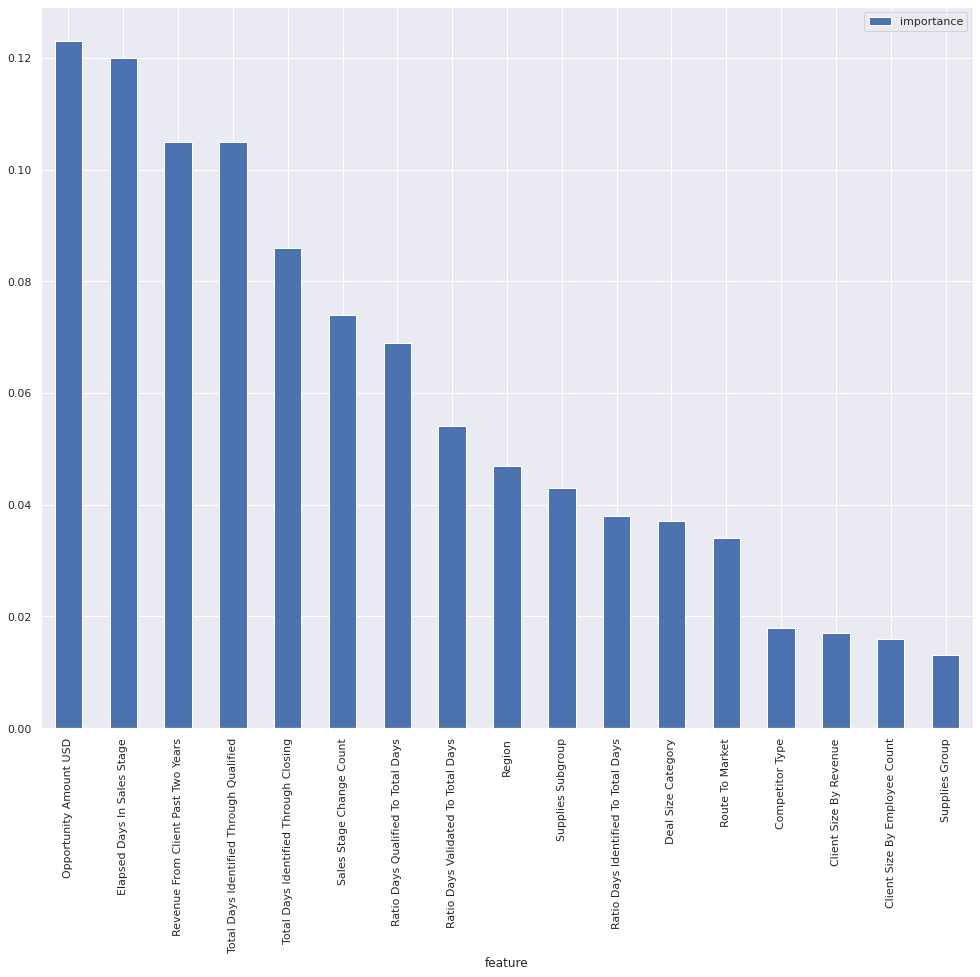

In [27]:
importances.plot.bar()

In [28]:
train_df  = data_train.drop("Client Size By Employee Count", axis=1)
test_df  = data_test.drop("Client Size By Employee Count", axis=1)

train_df  = train_df.drop("Competitor Type", axis=1)
test_df  = test_df.drop("Competitor Type", axis=1)

In [29]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_train)

random_forest.score(data_train, target_train)

acc_random_forest = round(random_forest.score(data_train, target_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.97 %


In [30]:
print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")


OOB SCORE: 87.92999999999999 %


In [31]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(data_train, target_train)
# clf.bestparams

In [32]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_test)

random_forest.score(data_train, target_train)

print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")

OOB SCORE: 88.11 %


In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, data_train, target_train, cv=3)
confusion_matrix(target_train, predictions)

array([[40024,  2308],
       [ 4324,  7961]])

In [34]:
from sklearn.metrics import precision_score, recall_score

print("Độ chính xác: %.3f" % precision_score(target_train, predictions))
print("Recall: %.3f" % recall_score(target_train, predictions))

Độ chính xác: 0.775
Recall: 0.648


In [35]:
from sklearn.metrics import f1_score
print ("%.3f" % f1_score(target_train, predictions))

0.706


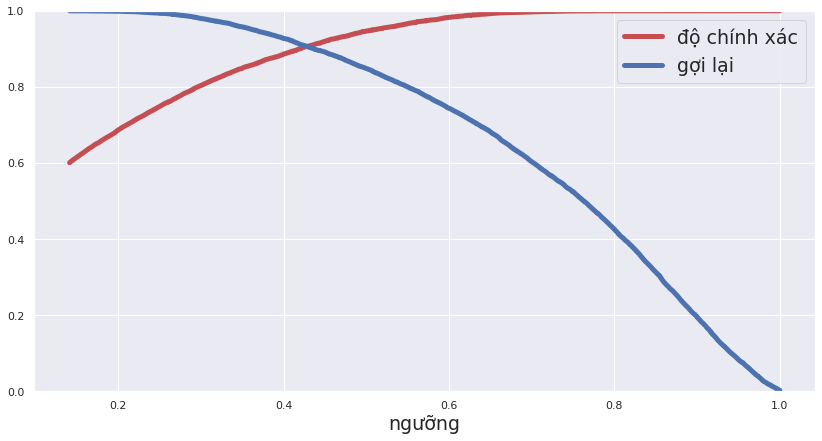

In [36]:
from sklearn.metrics import precision_recall_curve

# nhận được xác suất của các dự đoán
y_scores = random_forest.predict_proba(data_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(target_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="độ chính xác", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="gợi lại", linewidth=5)
    plt.xlabel("ngưỡng", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

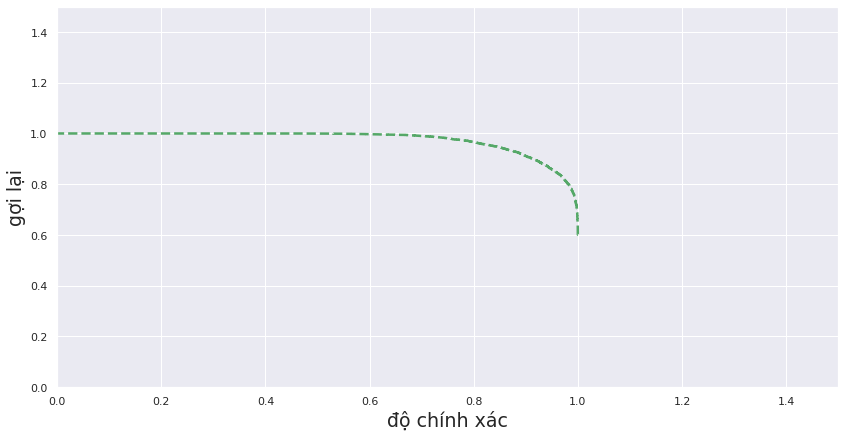

In [37]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("gợi lại", fontsize=19)
    plt.xlabel("độ chính xác", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

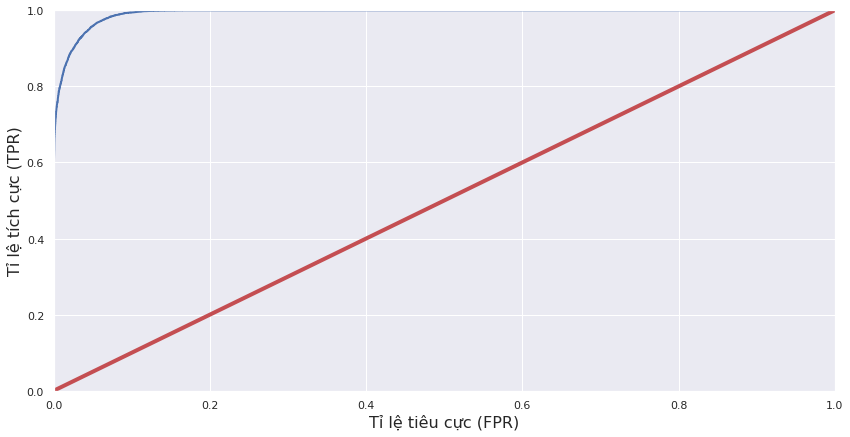

In [38]:
from sklearn.metrics import roc_curve
# tính toán tỷ lệ tích cực và tỷ lệ tiêu cực
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, y_scores)
# Biểu đồ phân tích
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Tỉ lệ tiêu cực (FPR)', fontsize=16)
    plt.ylabel('Tỉ lệ tích cực (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(target_train, y_scores)
print("ROC_AUC_SCORE:", r_a_score)

ROC_AUC_SCORE: 0.9926838331000667


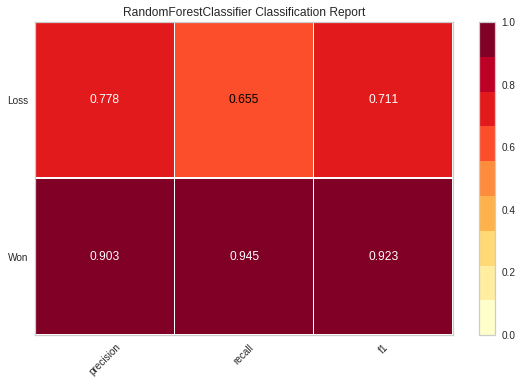

In [40]:
from yellowbrick.classifier import ClassificationReport
# Khởi tạo mô hình phân loại và trình hiển thị
visualizer = ClassificationReport(random_forest, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Điều chỉnh dữ liệu đào tạo với trình hiển thị
visualizer.score(data_test, target_test) # Đánh giá mô hình trên dữ liệu thử nghiệm
g = visualizer.poof() # Vẽ hiển thị

In [99]:
# Tạo biểu đồ hình tròn để hiển thị phân phối dữ liệu 'Thắng' 'Mất', để xác nhận việc bảo tồn trên

plt.pie(
        # using data total)arrests
        [sales_data.loc[sales_data['Opportunity Result'] == 1,'Opportunity Amount USD'].shape[0], sales_data.loc[sales_data['Opportunity Result'] == 0,'Opportunity Amount USD'].shape[0]],
        # with the labels being officer names
        labels=sales_data['Opportunity Result'].unique(),
        # with no shadows
        shadow=False,
        # with one slide exploded out
        explode=(0, 0.15),
        # with the percent listed as a fraction
        autopct='%1.1f%%',
    )

# View the plot
plt.show()
print(sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0]/(sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0] + sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]) * 100)
print(sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]/(sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0] + sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]) * 100)
print(sales_data.agg('sales_data['Opportunity Amount USD']':np.sum))
# print(sales_data.loc[sales_data['Opportunity Result'] == 0,'Opportunity Amount USD'].shape[0])

SyntaxError: invalid syntax (<ipython-input-99-b733eed51057>, line 20)

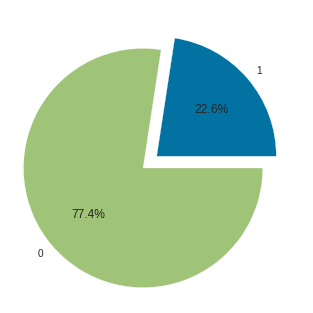

Dự đoán: tỉ lệ loss:  77.41 % và tỉ lệ win:  22.59 %


In [42]:
# Tạo biểu đồ hình tròn để hiển thị phân phối dữ liệu 'Thắng' 'Mất', để xác nhận việc bảo tồn trên
plt.pie(
        # sử dụng tổng số dữ liệu
        [sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0], sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]],
        # 
        labels=sales_data['Opportunity Result'].unique(),
        # không có bóng
        shadow=False,
        # with one slide exploded out
        explode=(0, 0.15),
        # với phần trăm được liệt kê dưới dạng phân số
        autopct='%1.1f%%',
    )
# View the plot
plt.show()
won = sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0]/(sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0] + sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]) * 100
loss = sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]/(sales_data.loc[sales_data['Opportunity Result'] == 1].shape[0] + sales_data.loc[sales_data['Opportunity Result'] == 0].shape[0]) * 100
#ket luan
new_data_instance = ["Exterior Accessories", "Car Accessories", "Northwest",
                     "Fields Sales", 76, 13, 104, 101, 0, 5, 5, 0, "Unknown", 0.69636, 0.113985, 0.154215, 1]

new_data_instance = le.fit_transform(new_data_instance)

inference = random_forest.predict([new_data_instance])
if inference[0] == 0:
    print("Dự đoán: tỉ lệ loss: ",(round(loss, 2)),"%", "và tỉ lệ win: ",(round(won, 2)),"%")
elif inference[0] == 1:
    print("Dự đoán: tỉ lệ win: ",(round(won, 2)),"%", "và tỉ lệ loss:" , (round(loss, 2)),"%")
else:
    print(inference)